<a href="https://colab.research.google.com/github/roryclaydon1994/BrownianMotionExamples/blob/main/ExtactingDiffusionConstant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, we use the experimental data from the temperature measurements to extract the diffusion constant. It appears this is only tracked in 1D so we will fit this to the 1D diffusion PDF.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Standard modules
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import scipy.optimize as scopt
import pandas as pd
from glob import glob
import os
from pprint import pprint

# Set RNG seed
np.random.seed(19052021)

Define the functions we used in the previous script here.

In [43]:
def createMSDAndGetD(X,t,show=True,save_name=None):
  """
  Fits a straight line to the experimental MSD, and assuming 1D Brownian motion,
  calculates the diffusion coefficient.
  Parameters:
    X: Array, (N,M)
      X coordinates of the pollen particle, for N particles, M timesteps
    t:  Array, (M,1)
      times at which the measurement was taken. 
    show: bool
      If True, show the fit
    save_name: string
      if set, save the figure to this path

    Returns:
      D_est: float
        estimated diffusion constant  
  """
  msd = np.average((X-X[:,0][:,np.newaxis])**2, axis=0)
  f = lambda t,m,c: m*t + c
  popt,pcov=scopt.curve_fit(f,t,msd)
  D_est=0.5*popt[0]
  print(popt)
  fig,ax=plt.subplots(1,1)
  ax.set_xlabel("$t$")
  ax.set_ylabel("msd(t)")
  ax.plot(t,msd,label="data")
  ax.plot(t,f(t,*popt),label="fit")
  ax.set_xlim([t[0],t[-1]])
  ax.set_ylim([msd.min(),msd.max()])
  plt.legend()
  if save_name != None:
    fig.savefig(save_name)
  if show:
    plt.show()
  else:
    plt.close()
  return D_est

Find the data files

I assume the first entry is the time, and the rest is the final x coordinate of all the different pollen grains?

In [41]:
dir="/content/drive/MyDrive/BrownianMotion/data/Temperature/"
temp_files=glob(f"{dir}/Temperature_*.csv")

# Extract temperature from the file name (not the cleanest way to do this)
f = lambda s: float(os.path.splitext(os.path.basename(s))[0].split("_")[1])

# Sort the files in order of ascending temperature
temp_files.sort(key=f)

# Save the temperature as a seperate variable
temps = [f(file) for file in temp_files]

# Check it looks right
pprint(list(zip(temps,temp_files)))

# Check sample data
t0dat=np.loadtxt(temp_files[0])
print(t0dat)

[(10.1,
  '/content/drive/MyDrive/BrownianMotion/data/Temperature/Temperature_10.1.csv'),
 (11.2,
  '/content/drive/MyDrive/BrownianMotion/data/Temperature/Temperature_11.2.csv'),
 (13.3,
  '/content/drive/MyDrive/BrownianMotion/data/Temperature/Temperature_13.3.csv'),
 (15.2,
  '/content/drive/MyDrive/BrownianMotion/data/Temperature/Temperature_15.2.csv'),
 (21.8,
  '/content/drive/MyDrive/BrownianMotion/data/Temperature/Temperature_21.8.csv')]
[  4.          26.9          8.39         8.34         5.53
   4.          10.6          5.85         5.16         8.44
   4.15         4.72         7.58         1.74         4.63
   5.53         8.97        -0.24         4.32         7.96
   4.63         4.07         6.68        -1.78         4.46
  12.           8.86         1.15         3.94         3.09
   4.83        10.4         10.           2.22         6.36
   0.96       -23.76745626  -8.96       -13.89        -4.29
  -4.01        -9.837       -4.22        -6.208       -2.7
  -2.642   

Finding diffusion constant for T=10.1
final time = 4.0
[1.20390557e+01 4.75750021e-24]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


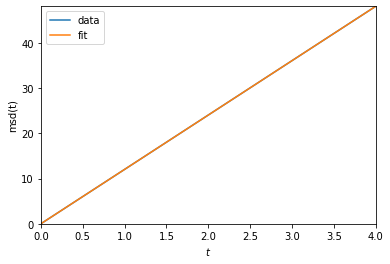

Finding diffusion constant for T=11.2
final time = 4.0
[3.53225944e+00 4.75750021e-24]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


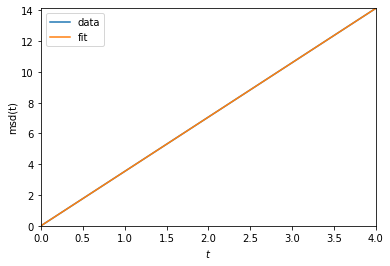

Finding diffusion constant for T=13.3
final time = 0.133
[ 2.30877791e-03 -1.00012529e-35]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


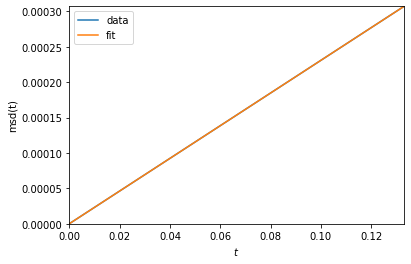

Finding diffusion constant for T=15.2
final time = 4.0
[2.42380764e+00 4.75750021e-24]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


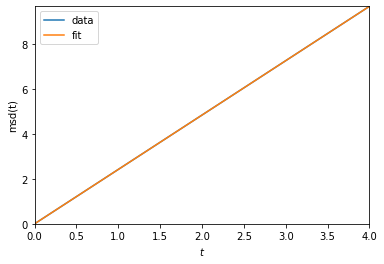

Finding diffusion constant for T=21.8
final time = 4.0
[1.37041817e+01 4.75750021e-24]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


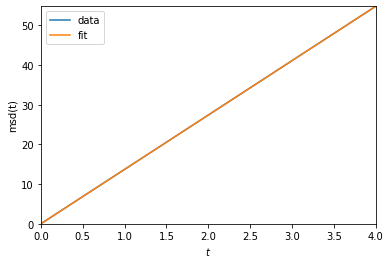

In [46]:
Ds=[]
for temp,file in zip(temps,temp_files):
  print(f"Finding diffusion constant for T={temp}")
  x_dat=np.loadtxt(file)
  time=x_dat[0]
  print(f"final time = {time}")
  xs=np.zeros((len(x_dat)-1,2))
  
  # Converted to microns
  xs[:,1]=x_dat[1:]
  ts=np.array([0,time])
  D_est=createMSDAndGetD(xs,ts,show=True)
  Ds.append(D_est)


Let's check what we got!

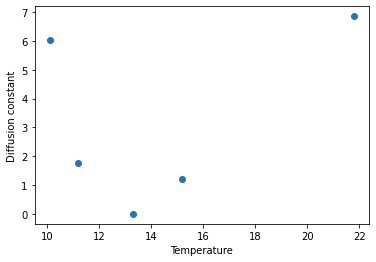

In [48]:
plt.scatter(temps,Ds)
plt.xlabel("Temperature")
plt.ylabel("Diffusion constant")
plt.show()